# Machine Learning Models with Climate Change Data

### This project uses a dataset that records various climate change indicators for various countries since the beginning of the 20th century to develop a machine learning model that can be used to assess what indicators are best used to predict warming patterns.

In [1]:
# Import data visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore

# Import machine learning libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans


# First model iteration

In [2]:
# Upoad data to pandas dataframe
gw_df = pd.read_csv('Resources/global_warming_data_sql.csv')

# Data Cleaning: Drop duplicates and handle missing values
gw_df = gw_df.drop_duplicates().dropna()
gw_df.head()

,country,year,temperature_anomaly,co2_emissions,population,forest_area,gdp,renewable_energy_usage,methane_emissions,sea_level_rise,...,waste_management,per_capita_emissions,industrial_activity,air_pollution_index,biodiversity_index,ocean_acidification,fossil_fuel_usage,energy_consumption_per_capita,policy_score,average_temperature
0,Country_103,1913,-1.163537,8.876061e+08,1.627978e+08,54.872178,6.139887e+12,76.710013,8.317626e+06,8.111839,...,82.691409,2.285351,4.060975,150.285539,90.073356,8.025470,39.163860,1480.164332,78.870012,20.825292
1,Country_180,1950,-0.432122,4.497517e+08,4.281359e+08,84.051006,2.601447e+12,68.450021,6.206540e+06,42.025915,...,59.322883,17.411668,85.300604,27.305922,88.289837,8.021719,28.252554,1482.730048,32.600905,28.720587
2,Country_93,2014,0.444954,4.579080e+08,4.926732e+08,72.295357,5.192677e+12,36.725699,1.056885e+06,20.953840,...,94.982931,12.039703,83.804880,216.911429,86.936256,7.647408,61.548382,706.918809,37.671300,15.014084
3,Country_15,2020,-1.171616,5.049503e+08,1.252169e+09,17.259684,8.252128e+12,77.547901,1.986813e+06,45.599595,...,62.064250,2.853957,47.014265,35.869182,44.904331,7.569353,82.423750,2616.238324,86.581725,-1.277086
4,Country_107,1964,-0.564038,6.898891e+08,2.932960e+08,44.438605,8.560746e+12,10.019576,3.313252e+06,7.652150,...,84.431279,19.801173,89.379613,284.263093,8.102916,8.015415,29.964450,4975.683780,20.618406,2.861989


In [3]:
# Feature Selection and Normalization
X = gw_df.drop(columns=['average_temperature', 'country', 'year'])  # Features, drop non-numerical columns
y = gw_df['average_temperature']  # Target variable

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Standardize the features
std_scaler = StandardScaler()
X_standardized = std_scaler.fit_transform(X_scaled)

# Standardize target variable
y = (y - y.mean()) / y.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate and different loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='msle', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}")

Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 734us/step - loss: 0.1742 - mae: 1.1718 - val_loss: 0.1288 - val_mae: 0.9047
Epoch 2/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 788us/step - loss: 0.1261 - mae: 0.9015 - val_loss: 0.1264 - val_mae: 0.8958
Epoch 3/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 787us/step - loss: 0.1258 - mae: 0.8985 - val_loss: 0.1265 - val_mae: 0.8947
Epoch 4/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 707us/step - loss: 0.1252 - mae: 0.8960 - val_loss: 0.1264 - val_mae: 0.8954
Epoch 5/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 741us/step - loss: 0.1259 - mae: 0.9023 - val_loss: 0.1263 - val_mae: 0.8974
Epoch 6/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 721us/step - loss: 0.1256 - mae: 0.9004 - val_loss: 0.1263 - val_mae: 0.8983
Epoch 7/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 705us/step - loss: 0.1253 - mae: 0.8991 - val_loss: 0.1264 - val_mae: 0.8988
Epoch 8/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 716us/step - loss: 0.1253 - mae: 0.9000 - val_loss: 0.1263 - val_mae: 0.8973
Epoch 9/50
5000/5000 ━━━━━━━━━━━━━━

In [4]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

625/625 - 0s - 566us/step - loss: 0.1281 - mae: 0.8956
Loss: 0.1281076818704605, Accuracy: 0.8956294655799866


In [ ]:
# Export our first model to HDF5 file
model.save("h5_files/climate_model_1.h5")

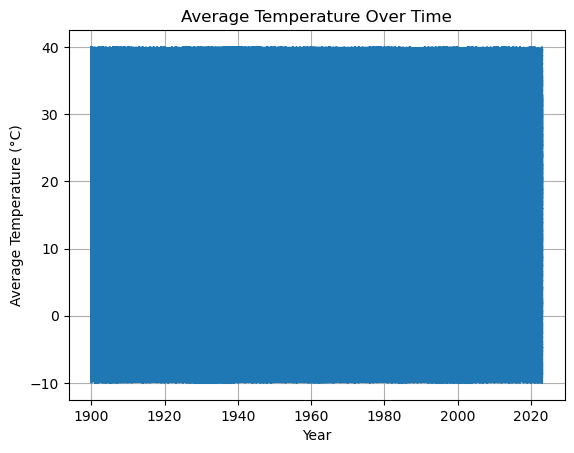

In [6]:
# Plot the data
plt.plot(gw_df['year'], gw_df['average_temperature'])
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature Over Time")
plt.grid(True)
plt.show()

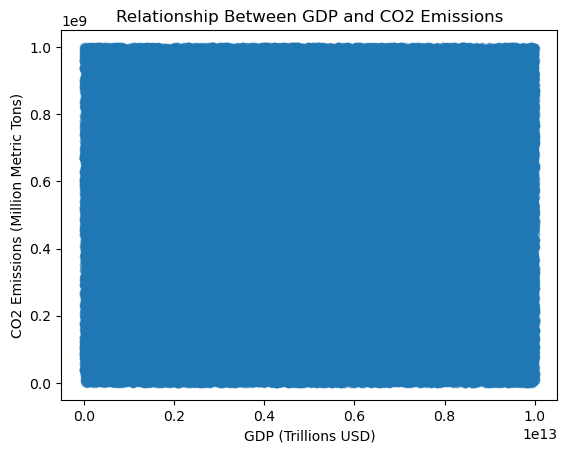

In [7]:
# Scatter plot with regression
sns.regplot(x=gw_df['gdp'], y=gw_df['co2_emissions'], scatter_kws={"alpha":0.5})
plt.xlabel("GDP (Trillions USD)")
plt.ylabel("CO2 Emissions (Million Metric Tons)")
plt.title("Relationship Between GDP and CO2 Emissions")
plt.show()

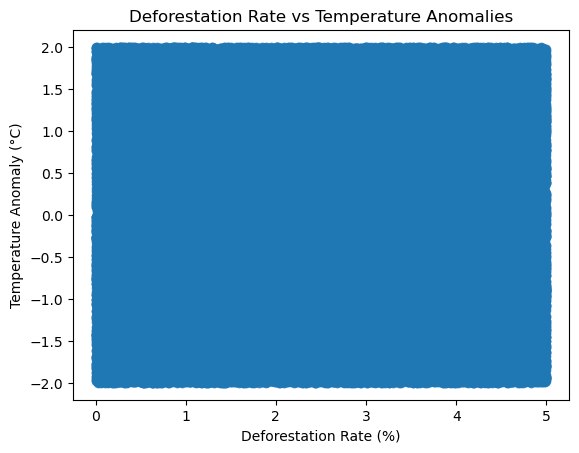

In [8]:
# Scatter plot with regression
sns.regplot(x=gw_df['deforestation_rate'], y=gw_df['temperature_anomaly'])
plt.xlabel("Deforestation Rate (%)")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Deforestation Rate vs Temperature Anomalies")
plt.show()

### The first model performed as follows:
### 625/625 - 0s - 566us/step - loss: 0.1281 - mae: 0.8956
### Loss: 0.1281076818704605, Accuracy: 0.8956294655799866

# Second model iteration

In [10]:
gw_cleaned_df = pd.read_csv('Resources/global_warming_data_sql_cleaned.csv')

# Data Cleaning: Drop duplicates and handle missing values
gw_cleaned_df = gw_cleaned_df.drop_duplicates().dropna()
gw_cleaned_df.head()

,country,year,temperature_anomaly,co2_emissions,population,forest_area,gdp,renewable_energy_usage,methane_emissions,sea_level_rise,...,waste_management,per_capita_emissions,industrial_activity,air_pollution_index,biodiversity_index,ocean_acidification,fossil_fuel_usage,energy_consumption_per_capita,policy_score,average_temperature
0,Country_1,1900,-0.335027,3.984644e+08,3.750466e+08,27.856810,4.573252e+12,60.185651,5.169077e+06,24.478590,...,73.044383,10.581177,57.202100,160.881364,45.789450,8.079238,52.427376,2657.026661,42.942318,5.502509
1,Country_1,1901,0.170373,8.440511e+08,1.001558e+09,69.848395,4.868018e+12,39.525191,2.619170e+06,11.040926,...,50.237963,10.221387,27.407770,130.857790,51.708924,8.149605,76.355544,3506.219973,16.954388,19.801916
2,Country_1,1902,0.448391,7.090039e+08,3.604418e+08,50.116560,5.464041e+12,71.867926,6.380284e+06,27.972579,...,42.104585,6.778345,59.227467,166.268018,73.520410,7.903046,57.531928,2164.926898,48.193189,18.555981
3,Country_1,1903,1.254878,7.388654e+08,9.164562e+08,68.083451,4.415206e+12,45.673511,5.175568e+06,13.719263,...,18.991930,5.860874,48.448145,189.446269,55.501725,8.021785,45.270020,2062.859869,49.178483,25.610792
4,Country_1,1904,0.455433,5.804757e+08,4.870284e+08,21.907529,5.453627e+12,55.241938,3.343214e+06,11.041168,...,53.156173,7.771085,65.220926,117.647816,57.842259,7.875292,39.504759,3453.870114,34.840441,16.345709


In [11]:
# Feature Selection and Normalization
X = gw_cleaned_df.drop(columns=['average_temperature', 'country', 'year'])  # Features, drop non-numerical columns
y = gw_cleaned_df['average_temperature']  # Target variable

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Standardize the features
std_scaler = StandardScaler()
X_standardized = std_scaler.fit_transform(X_scaled)

# Standardize target variable
y = (y - y.mean()) / y.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate and different loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='msle', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}")

Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1190/1190 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - loss: 0.2064 - mae: 1.0092 - val_loss: 0.1575 - val_mae: 0.8415
Epoch 2/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - loss: 0.1463 - mae: 0.8338 - val_loss: 0.1286 - val_mae: 0.8253
Epoch 3/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 0.1225 - mae: 0.8171 - val_loss: 0.1233 - val_mae: 0.8237
Epoch 4/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - loss: 0.1173 - mae: 0.8054 - val_loss: 0.1222 - val_mae: 0.8269
Epoch 5/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - loss: 0.1171 - mae: 0.8102 - val_loss: 0.1210 - val_mae: 0.8212
Epoch 6/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 0.1144 - mae: 0.8067 - val_loss: 0.1237 - val_mae: 0.8332
Epoch 7/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 0.1129 - mae: 0.8036 - val_loss: 0.1192 - val_mae: 0.8196
Epoch 8/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - loss: 0.1130 - mae: 0.8055 - val_loss: 0.1251 - val_mae: 0.8358
Epoch 9/50
1190/1190 ━━━━━━━━━━━━━━

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

149/149 - 0s - 741us/step - loss: 0.1526 - mae: 0.8583
Loss: 0.1525958925485611, Accuracy: 0.858296275138855


In [13]:
# Export our second model to HDF5 file
model.save("h5_files/climate_model_2.h5")

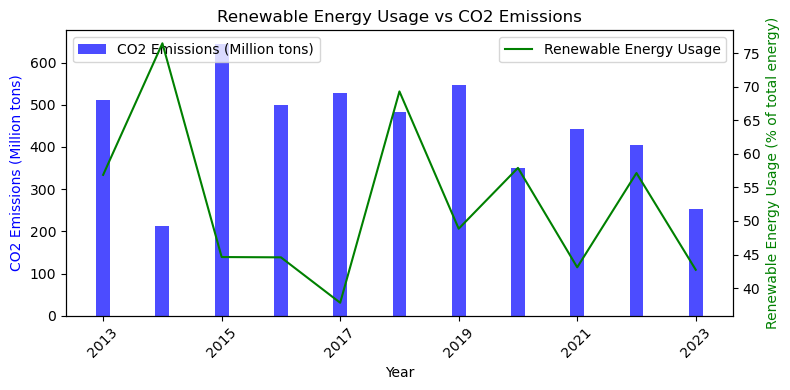

In [14]:
# Filter and sort the data
last_10_years_data = gw_cleaned_df[gw_cleaned_df['year'] >= 2013].sort_values(by='year')

# Remove duplicate years, keeping the first entry
last_10_years_data = last_10_years_data.drop_duplicates(subset='year', keep='first')

# Set the positions of the bars and prepare the plot
bar_width = 0.35  # Good balance for bar width
index = np.arange(len(last_10_years_data['year'])) * 1.5  # Adjust index multiplier to space out the bars

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 4))  # Adjust figure size for better visualization

# Bar plot for CO2 Emissions
ax1.bar(index, last_10_years_data['co2_emissions']/1e6, bar_width, label='CO2 Emissions (Million tons)', color='b', alpha=0.7)

# Create the twin axis for the line plot
ax2 = ax1.twinx()
ax2.plot(index, last_10_years_data['renewable_energy_usage'], 'g-', label='Renewable Energy Usage')

# Labeling and aesthetics
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (Million tons)', color='b')
ax2.set_ylabel('Renewable Energy Usage (% of total energy)', color='g')
ax1.set_title('Renewable Energy Usage vs CO2 Emissions')

# Adjust tick parameters: Display every other year
tick_positions = index[::2]  # Take every second element for ticks
tick_labels = last_10_years_data['year'].iloc[::2]  # Corresponding labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45)  # Rotate labels for better fit

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()  # Optimize layout to prevent clipping of tick-labels
plt.show()

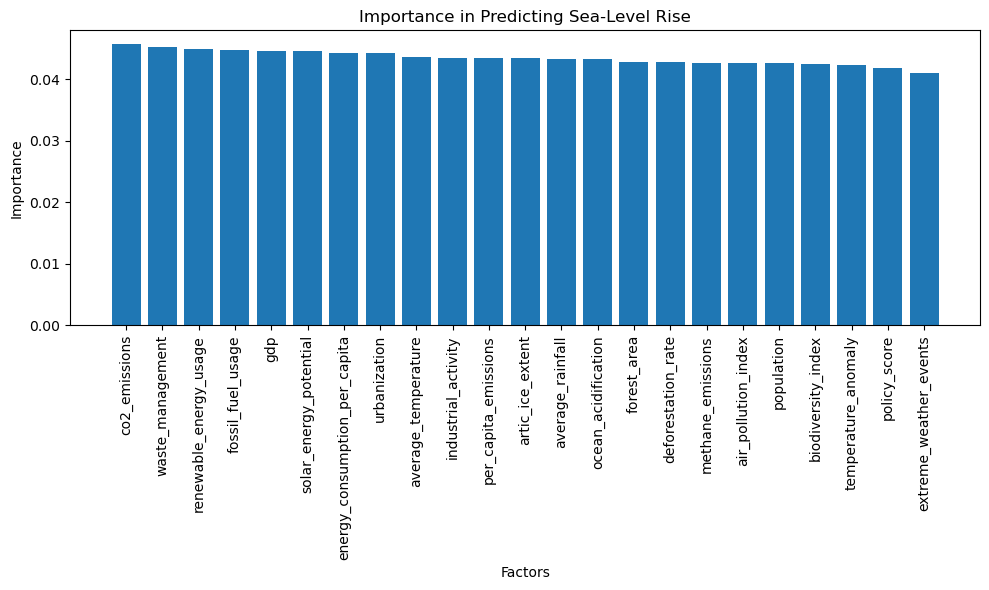

In [15]:
# Drop non-numeric and non-relevant columns
X = gw_cleaned_df.drop(['country', 'year', 'sea_level_rise'], axis=1)
y = gw_cleaned_df['sea_level_rise']

# Handle missing values if necessary
X.fillna(X.mean(), inplace=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot feature importances
plt.figure(figsize= (10, 6))
plt.title('Importance in Predicting Sea-Level Rise')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Factors')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

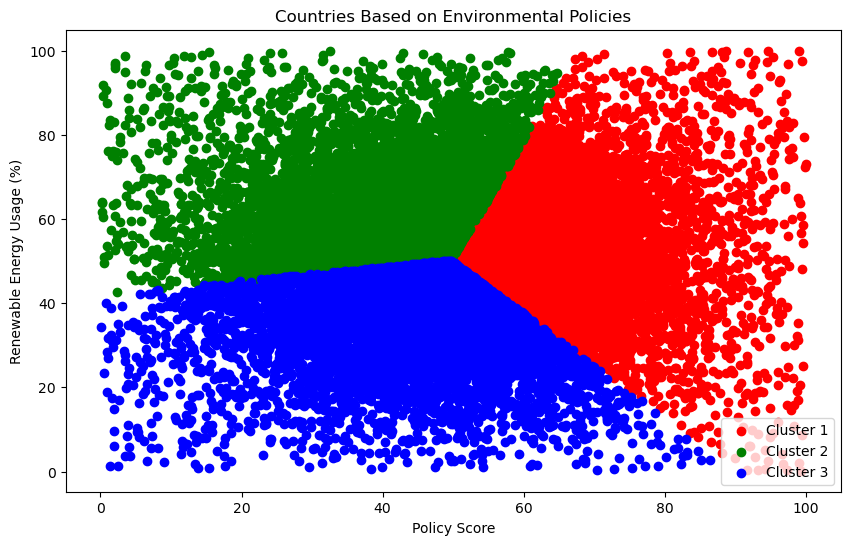

In [16]:
# Select relevant policy indicators
features = ['policy_score', 'renewable_energy_usage']
X = gw_cleaned_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
gw_cleaned_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):  # Loop through clusters
    cluster_data = gw_cleaned_df[gw_cleaned_df['Cluster'] == i]
    plt.scatter(cluster_data['policy_score'], cluster_data['renewable_energy_usage'], color=colors[i], label=f'Cluster {i+1}')

plt.title('Countries Based on Environmental Policies')
plt.xlabel('Policy Score')
plt.ylabel('Renewable Energy Usage (%)')
plt.legend()
plt.show()

### The second iteration of the model performs as follows:
### 149/149 - 0s - 741us/step - loss: 0.1526 - mae: 0.8583
### Loss: 0.1525958925485611, Accuracy: 0.858296275138855


# Third model iteration

In [17]:
# Reupload csv to the same pandas dataframe to reset the data
gw_cleaned_df = pd.read_csv('Resources/global_warming_data_sql_cleaned.csv')

# Data Cleaning: Drop duplicates and handle missing values
gw_cleaned_df = gw_cleaned_df.drop_duplicates().dropna()
gw_cleaned_df.head()

,country,year,temperature_anomaly,co2_emissions,population,forest_area,gdp,renewable_energy_usage,methane_emissions,sea_level_rise,...,waste_management,per_capita_emissions,industrial_activity,air_pollution_index,biodiversity_index,ocean_acidification,fossil_fuel_usage,energy_consumption_per_capita,policy_score,average_temperature
0,Country_1,1900,-0.335027,3.984644e+08,3.750466e+08,27.856810,4.573252e+12,60.185651,5.169077e+06,24.478590,...,73.044383,10.581177,57.202100,160.881364,45.789450,8.079238,52.427376,2657.026661,42.942318,5.502509
1,Country_1,1901,0.170373,8.440511e+08,1.001558e+09,69.848395,4.868018e+12,39.525191,2.619170e+06,11.040926,...,50.237963,10.221387,27.407770,130.857790,51.708924,8.149605,76.355544,3506.219973,16.954388,19.801916
2,Country_1,1902,0.448391,7.090039e+08,3.604418e+08,50.116560,5.464041e+12,71.867926,6.380284e+06,27.972579,...,42.104585,6.778345,59.227467,166.268018,73.520410,7.903046,57.531928,2164.926898,48.193189,18.555981
3,Country_1,1903,1.254878,7.388654e+08,9.164562e+08,68.083451,4.415206e+12,45.673511,5.175568e+06,13.719263,...,18.991930,5.860874,48.448145,189.446269,55.501725,8.021785,45.270020,2062.859869,49.178483,25.610792
4,Country_1,1904,0.455433,5.804757e+08,4.870284e+08,21.907529,5.453627e+12,55.241938,3.343214e+06,11.041168,...,53.156173,7.771085,65.220926,117.647816,57.842259,7.875292,39.504759,3453.870114,34.840441,16.345709


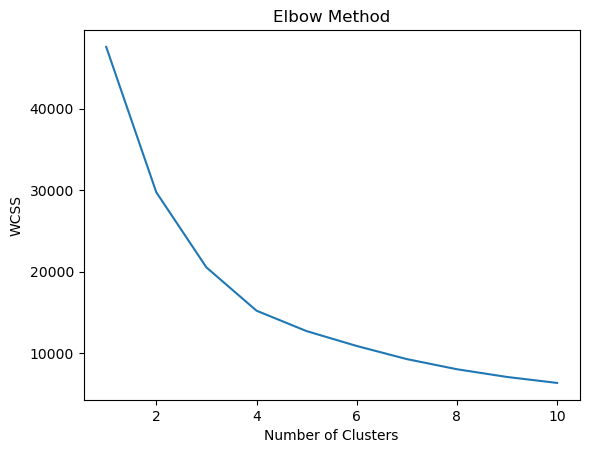

In [18]:
# Preprocess the data (assuming 'Average_Temperature ' and 'Year' columns are numeric and relevant)
X = gw_cleaned_df[['average_temperature', 'year']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score: 0.33958462745570817


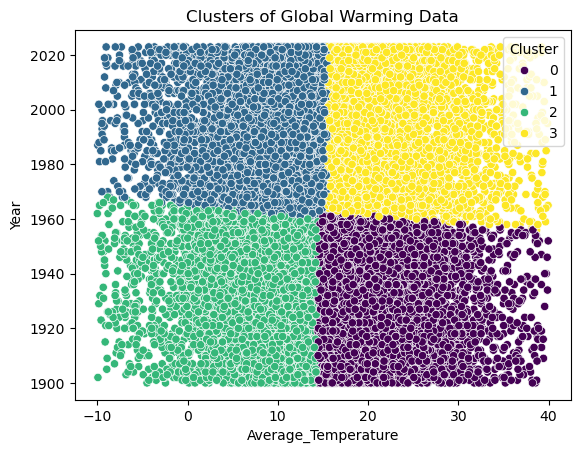

In [19]:
# Based on the elbow plot, choose the optimal number of clusters (e.g., 4)
optimal_k = 4 # Replace with your chosen k

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
gw_cleaned_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate the KMeans model
silhouette_avg = silhouette_score(X_scaled, gw_cleaned_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# A Silhouette Score of 0.33958 indicates that the k-means clustering model is performing moderately, but there's definitely room for improvement.
# Visualize the clusters
sns.scatterplot(x='average_temperature', y='year', hue='Cluster', data=gw_cleaned_df, palette='viridis') # Changed to existing column names
plt.title('Clusters of Global Warming Data')
plt.xlabel('Average_Temperature') # Changed to existing column name
plt.ylabel('Year') # Changed to existing column name
plt.show()

In [20]:
# Clean column names
gw_cleaned_df.columns = gw_cleaned_df.columns.str.strip().str.lower()

# Define expected columns and filter dataframe, also convert to lowercase
expected_columns = ["year", "extreme_weather_events", "co2_emissions", "population", "fossil_fuel_usage"]
gw_cleaned_df = gw_cleaned_df[expected_columns]
gw_cleaned_df.head()

,year,extreme_weather_events,co2_emissions,population,fossil_fuel_usage
0,1900,26.750000,3.984644e+08,3.750466e+08,52.427376
1,1901,27.000000,8.440511e+08,1.001558e+09,76.355544
2,1902,27.333333,7.090039e+08,3.604418e+08,57.531928
3,1903,26.750000,7.388654e+08,9.164562e+08,45.270020
4,1904,33.000000,5.804757e+08,4.870284e+08,39.504759


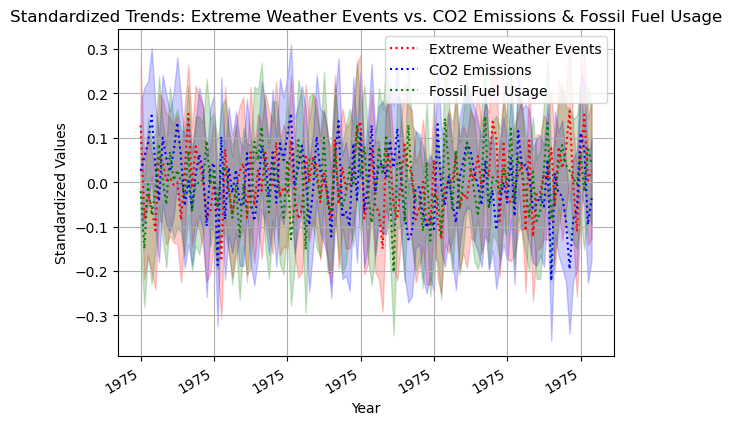


Correlation Matrix:
                             year  extreme_weather_events  co2_emissions  \
year                    1.000000                0.005772      -0.019691   
extreme_weather_events  0.005772                1.000000      -0.005101   
co2_emissions          -0.019691               -0.005101       1.000000   
population             -0.010579                0.000329      -0.001896   
fossil_fuel_usage       0.006768                0.003854       0.000042   

                        population  fossil_fuel_usage  
year                     -0.010579           0.006768  
extreme_weather_events    0.000329           0.003854  
co2_emissions            -0.001896           0.000042  
population                1.000000          -0.011150  
fossil_fuel_usage        -0.011150           1.000000  


In [21]:
# Standardize the data (excluding Year)
scaler = StandardScaler()
# Updated numerical_features to match lowercase column names in the DataFrame
numerical_features = ["extreme_weather_events", "co2_emissions", "population", "fossil_fuel_usage"]
# List of numerical columns to be scaled
gw_df_scaled = gw_cleaned_df.copy() # Create a copy to avoid modifying the original DataFrame
gw_df_scaled[numerical_features] = scaler.fit_transform(gw_cleaned_df[numerical_features]) #Apply scaler to numerical features only


# Plot standardized trends
fig, ax = plt.subplots()  # Create a figure and an axes object

sns.lineplot(data=gw_df_scaled, x="year", y="extreme_weather_events",
             label="Extreme Weather Events", linestyle="dotted", color="red", ax=ax)
sns.lineplot(data=gw_df_scaled, x="year", y="co2_emissions",
             label="CO2 Emissions", linestyle="dotted", color="blue", ax=ax)
sns.lineplot(data=gw_df_scaled, x="year", y="fossil_fuel_usage",
             label="Fossil Fuel Usage", linestyle="dotted", color="green", ax=ax)

# Enhancements
plt.title("Standardized Trends: Extreme Weather Events vs. CO2 Emissions & Fossil Fuel Usage")
plt.xlabel("Year")
plt.ylabel("Standardized Values")
plt.legend()
plt.grid(True)

# Format x-axis to show year as four digits
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate x-axis labels for better readability

# Show plot
plt.show()

# Correlation Analysis
correlation_matrix = gw_cleaned_df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

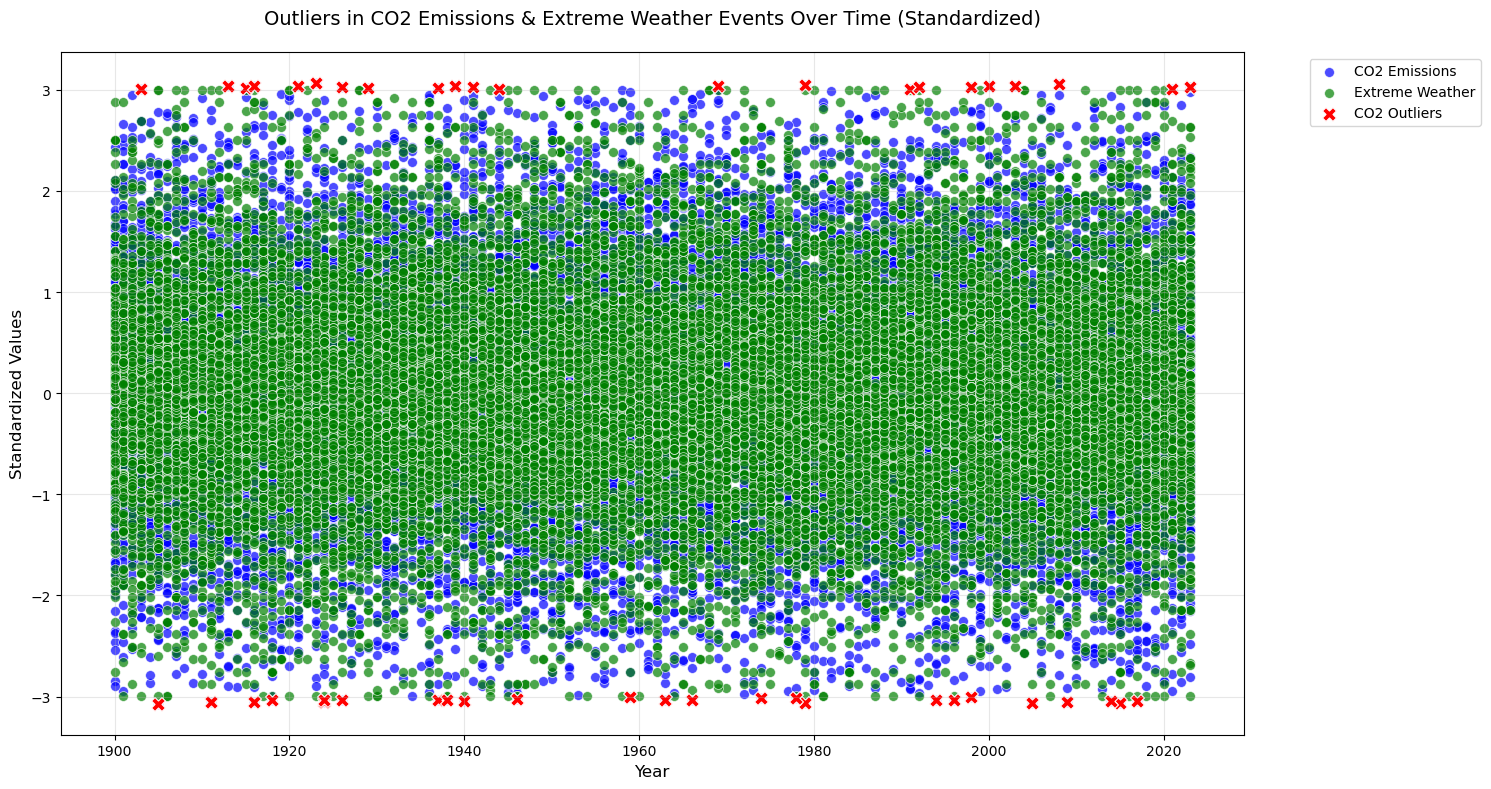


Summary of Anomalies:
Total number of observations: 23797
Number of CO2 anomalies: 47
Number of Weather anomalies: 0
Number of Isolation Forest anomalies: 1189


In [22]:
# Reload the dataframe and clean column names
gw_cleaned_df = pd.read_csv('Resources/global_warming_data_sql_cleaned.csv')

# Select features and handle missing values
features = ["co2_emissions", "extreme_weather_events", "year"]
# Ensure the column names in 'features' match the actual column names in your CSV
gw_cleaned_df = gw_cleaned_df[features].dropna() # Now features is defined before use

# Set Year as index
gw_cleaned_df.set_index('year', inplace=True)

### Standardize Data ###
scaler = StandardScaler()
gw_df_scaled = pd.DataFrame(scaler.fit_transform(gw_cleaned_df), columns=["co2_emissions", "extreme_weather_events"], index=gw_cleaned_df.index)


### Z-SCORE METHOD ###
# Calculate Z-scores using the original columns
co2_zscore = np.abs(zscore(gw_cleaned_df["co2_emissions"]))
weather_zscore = np.abs(zscore(gw_cleaned_df["extreme_weather_events"]))

# Identify outliers (Z-score > 3)
co2_outliers = co2_zscore > 3
weather_outliers = weather_zscore > 3

### ISOLATION FOREST METHOD ###
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_scores = iso_forest.fit_predict(gw_df_scaled)

### PLOT ANOMALIES ###
plt.figure(figsize=(15, 8))

# Plot normal points
sns.scatterplot(data=gw_df_scaled, x=gw_cleaned_df.index, y="co2_emissions",
                label="CO2 Emissions", color="blue", alpha=0.7, s=50)
sns.scatterplot(data=gw_df_scaled, x=gw_cleaned_df.index, y="extreme_weather_events",
                label="Extreme Weather", color="green", alpha=0.7, s=50)

# Highlight CO2 outliers
co2_anomalies = gw_df_scaled[co2_outliers]
sns.scatterplot(data=co2_anomalies, x=co2_anomalies.index, y="co2_emissions",
                color="red", label="CO2 Outliers", marker="X", s=100)

# Highlight Weather outliers
weather_anomalies = gw_df_scaled[weather_outliers]
sns.scatterplot(data=weather_anomalies, x=weather_anomalies.index, y="extreme_weather_events",
                color="orange", label="Weather Outliers", marker="X", s=100)

# Plot Enhancements
plt.title("Outliers in CO2 Emissions & Extreme Weather Events Over Time (Standardized)",
          fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Standardized Values", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print summary statistics
print("\nSummary of Anomalies:")
print(f"Total number of observations: {len(gw_cleaned_df)}")
print(f"Number of CO2 anomalies: {co2_outliers.sum()}")
print(f"Number of Weather anomalies: {weather_outliers.sum()}")
print(f"Number of Isolation Forest anomalies: {(anomaly_scores == -1).sum()}")

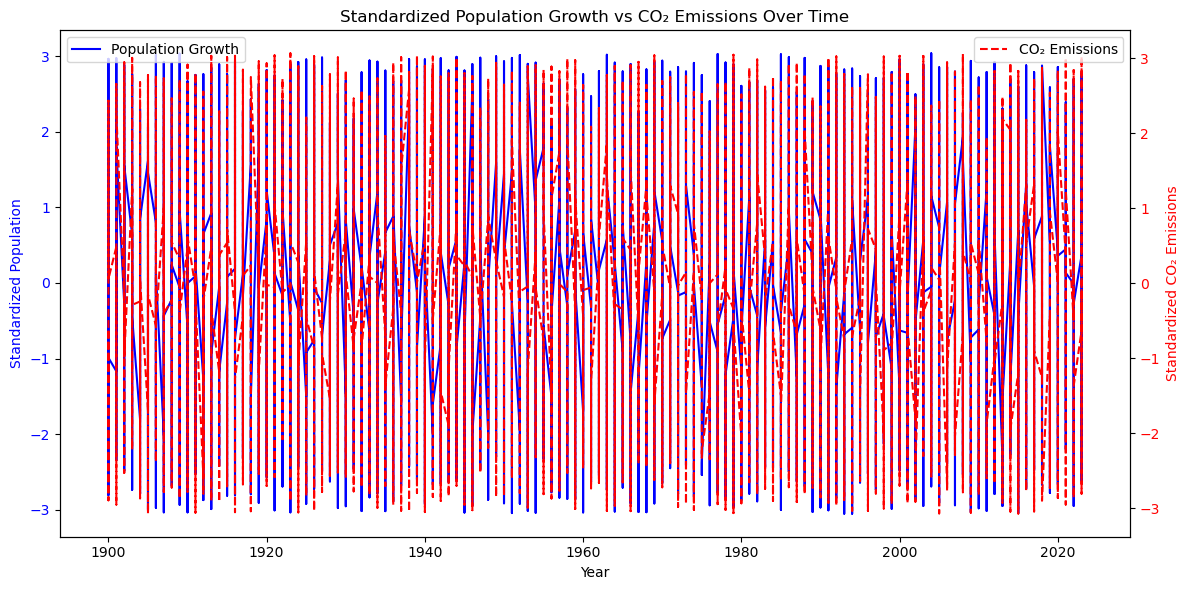

In [23]:
# Reload the dataframe and clean column names
gw_cleaned_df = pd.read_csv('Resources/global_warming_data_sql_cleaned.csv')
gw_cleaned_df.columns = gw_cleaned_df.columns.str.strip().str.lower()  # Remove leading/trailing spaces and convert to lowercase

# Define expected columns, ensuring they match the case after cleaning (lowercase)
expected_columns = ["year", "extreme_weather_events", "co2_emissions", "population", "fossil_fuel_usage"]
gw_cleaned_df = gw_cleaned_df[expected_columns]

# Convert "year" to datetime and sort
gw_cleaned_df["year"] = pd.to_datetime(gw_cleaned_df["year"], format="%Y")
gw_cleaned_df.sort_values("year", inplace=True)

# Apply StandardScaler to Population and CO2_Emissions # 'CO2_Emissions' changed to 'co2_emissions'
scaler = StandardScaler()
gw_df_scaled = gw_cleaned_df.copy()
gw_df_scaled[["population", "co2_emissions"]] = scaler.fit_transform(gw_cleaned_df[["population", "co2_emissions"]]) # 'Population' and 'CO2_Emissions' changed to 'population' and 'co2_emissions' respectively

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Standardized Population Growth # 'Population' changed to 'population'
ax1.set_xlabel("Year")
ax1.set_ylabel("Standardized Population", color="blue")
ax1.plot(gw_cleaned_df["year"], gw_df_scaled["population"], color="blue", label="Population Growth") # 'Year' and 'Population' changed to 'year' and 'population' respectively
ax1.tick_params(axis="y", labelcolor="blue")

# Create secondary y-axis for CO₂ Emissions # 'CO2_Emissions' changed to 'co2_emissions'
ax2 = ax1.twinx()
ax2.set_ylabel("Standardized CO₂ Emissions", color="red")
ax2.plot(gw_cleaned_df["year"], gw_df_scaled["co2_emissions"], linestyle="dashed", color="red", label="CO₂ Emissions")  # 'Year' and 'CO2_Emissions' changed to 'year' and 'co2_emissions' respectively
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("Standardized Population Growth vs CO₂ Emissions Over Time")
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.show()

### Silhouette Score for final model iteration: 0.33958462745570817

### Summary of Anomalies:
### Total number of observations: 23797
### Number of CO2 anomalies: 47
### Number of Weather anomalies: 0
### Number of Isolation Forest anomalies: 1189